## Итоговый проект по курсу "Python для анализа данных"

In [14]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Загрузите файл HR.csv в pandas dataframe

df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### признаки датасета

 satisfaction_level - Уровень удовлетворенности работой
 
 Last_evaluation - Время с момента последней оценки в годах
 
 number_projects - Количество проектов, выполненных за время работы
 
 average_monthly_hours - Среднее количество часов на рабочем месте в месяц
 
 time_spend_company - Стаж работы в компании в годах
 
 work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
 
 left - уволился ли сотрудник
 
 promotion_last_5years - повышался ли сотрудник за последние пять лет
 
 department - отдел в котором работает сотрудник
 
 salary - относительный уровень зарплаты


In [4]:
# 2. Рассчитайте основные статистики для переменных
# (среднее,медиана,мода,мин/макс,сред.отклонение)
# мода не рассчитывается методом describe, поэтому добавим ее к описательным статистикам отдельно

desc = df.describe(include = 'all')
desc.loc['mode'] = df.mode().loc[0]
desc.head(20)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Две переменные с наибольшей положительной корреляцией равной 0.42: average_montly_hours и number_project
Две переменные с наибольшей отрицательной корреляцией равной -0.39: left и satisfaction_level
Две переменные с наименьшей корреляцией равной 0.00212: Work_accident и time_spend_company


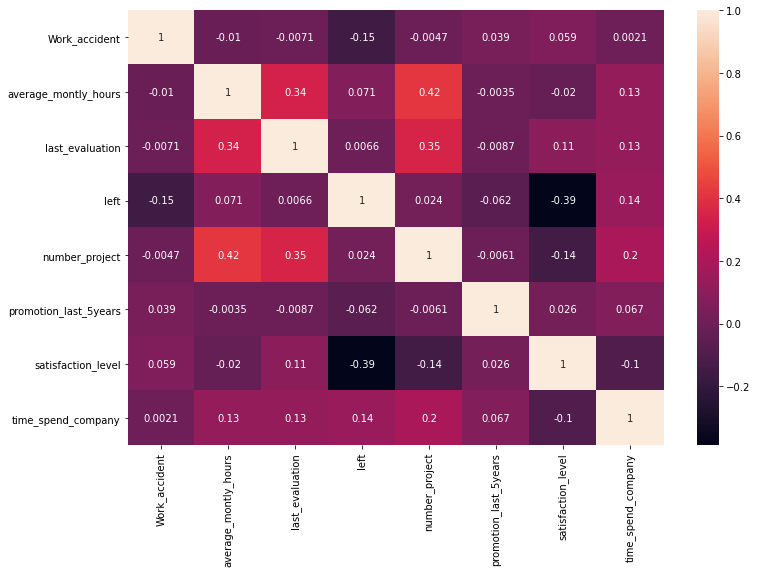

In [5]:
# 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. 
# Определите две самые скоррелированные и две наименее скоррелированные переменные

corr_df = df[df.columns.difference(['department', 'salary'])].corr()
corr_ar = corr_df.values.copy()
np.fill_diagonal(corr_ar, None)

imax = np.unravel_index(np.nanargmax(corr_ar), corr_ar.shape)
imin = np.unravel_index(np.nanargmin(corr_ar), corr_ar.shape)
imin2 = np.unravel_index(np.nanargmin(np.absolute(corr_ar)), corr_ar.shape)
print(f'Две переменные с наибольшей положительной корреляцией равной {round(corr_ar[imax], 2)}: {corr_df.index[imax[0]]} и {corr_df.columns[imax[1]]}')
print(f'Две переменные с наибольшей отрицательной корреляцией равной {round(corr_ar[imin], 2)}: {corr_df.index[imin[0]]} и {corr_df.columns[imin[1]]}')
print(f'Две переменные с наименьшей корреляцией равной {round(corr_ar[imin2], 6)}: {corr_df.index[imin2[0]]} и {corr_df.columns[imin2[1]]}')


plt.figure(figsize = (12, 8))
sns.heatmap(df[df.columns.difference(['department', 'salary'])].corr(), annot = True);

In [6]:
# 4. Рассчитайте сколько сотрудников работает в каждом департаменте

df['department'].value_counts()


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

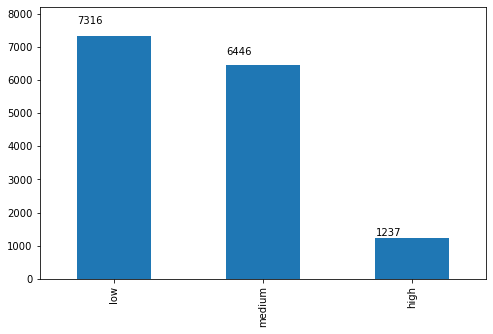

In [7]:
# 5. Показать распределение сотрудников по зарплатам

plt.figure(figsize = (8, 5))
ax = df['salary'].value_counts().plot(kind = 'bar') 
ax.set_ylim(0, 8200)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.05))


In [8]:
# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

zp = df[['department', 'salary']].groupby(['department', 'salary']).size().reset_index()
zp = zp.pivot(index = 'department', columns = 'salary', values = 0)
zp.columns = ['high', 'low', 'medium']
zp[['low', 'medium', 'high']]

,low,medium,high
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


In [9]:
# 7. Проверить гипотезу, что сотрудники с высоким окладом
# проводят на работе больше времени, чем сотрудники с низким окладом

# Нулевая гипотеза Н0: среднее переменной average_montly_hours сотрудников с высоким окладом равно аналогичному среднему 
# сотрудников с низким окладом
# Альтернативная гипотеза Н1: эти средние не равны

# из задания №5 мы знаем, что количество наблюдений в сравниваемых рядах значительно превышает 30. 
# из сути переменных мы понимаем, что наблюдения можно считать независимыми
# проверим ряды на гомогенность дисперсий

s_low = df.loc[df['salary'] == 'low']['average_montly_hours']
s_high = df.loc[df['salary'] == 'high']['average_montly_hours']

print(f'Количество сотрудников с высоким окладом = {len(s_high)}, с низким окладом = {len(s_low)}')
print(f'Дисперсия ряда "высокий оклад" = {round(s_high.var(), 5)}, ряда "низкий оклад" = {round(s_low.var(), 5)}')

Количество сотрудников с высоким окладом = 1237, с низким окладом = 7316
Дисперсия ряда "высокий оклад" = 2276.28662, ряда "низкий оклад" = 2583.914


Дисперсии рядов не сильно различиются, поэтому применим стандартный Т-тест scipy.stats.ttest_ind(sample_1, sample_2)

In [15]:
sc.stats.ttest_ind(s_low, s_high)

Ttest_indResult(statistic=0.7288680398062308, pvalue=0.4661023478267259)

Значение pvalue, значительно превышающее 0.05, означает, что нулевая гипотеза не может быть отвергнута. 

In [16]:
sc.stats.ttest_ind(s_low, s_high, equal_var = False)

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)

Если запустить тест с указанием неравенства дисперсий, то результат не изменится

In [18]:
# Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 
# доля сотрудников с повышением за последние 5 лет 
# Средняя степень удовлетворенности 
# Среднее количество проектов

df[['left', 'promotion_last_5years', 'satisfaction_level', 'number_project']].groupby(['left']).mean()


,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


Возможно, наличие повышения за последние 5 лет положительно влияет на решение сотрудника остаться на работе. 

Уровень удовлетворенности тех, кто не был повышен, парадоксально выше аналогичного уровня тех, кого повысили. 

Количество проектов тех и других, видимо, значимо не различается. 

In [34]:
# Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился ли
# сотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Создаем датафреймы признаков и целевой переменной
X = df.copy()
X.drop(['department', 'salary', 'left'], axis = 1, inplace = True)
y = pd.DataFrame(df['left'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [35]:
y_train = y_train['left'].ravel()
y_test = y_test['left'].ravel()

In [49]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

print(f'Accuracy модели на обучающей выборке: {round(clf.score(X_train, y_train), 4)}')
print(f'Accuracy модели на тестовой выборке: {round(clf.score(X_test, y_test), 4)}')


Accuracy модели на обучающей выборке: 0.7646
Accuracy модели на тестовой выборке: 0.7533


In [50]:
# так как наша целевая переменная распределена неравномерно - доля уволившихся составляет только 23.8%, имеет
# смысл для оценки модели применить более устойчивую метрику ROC AUC
from sklearn.metrics import roc_auc_score

print(f'ROC_AUC модели на обучающей выборке: {round(roc_auc_score(y_train, clf.predict(X_train)), 4)}')
print(f'ROC_AUC модели на тестовой выборке: {round(roc_auc_score(y_test, clf.predict(X_test)), 4)}')

ROC_AUC модели на обучающей выборке: 0.5933
ROC_AUC модели на тестовой выборке: 0.574


Как видно, ROC AUC модели достаточно низок, таким образом линейный классификатор плохо разделяет классы. 